# Simulation

In this lesson, we will work through several examples of using random numbers to simulate real-world scenarios.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

# curriculum example visualizations
import viz
np.random.seed(1349)

### How will we utilize Python to obtain probabilities?

We will utilize Monte Carlo simulations.

A Monte Carlo simulation is a means to recreate potential events and empirically take the results of simiulated trials to obtain a reasonably precise estimate of a desired probability.

What does this mean for us here?

In [2]:
# Let's take a hypothetical base probability. 
# What is the probability of rolling a one (1) on a single, standard, fair six-sided die?


In [3]:
# Potential outcomes of a die roll:
possible_outcomes = [1,2,3,4,5,6]

In [4]:
# options that equal 1: just 1, literally one

In [5]:
ideal_roll = 1

In [6]:
theoretical_prob = ideal_roll / len(possible_outcomes)
theoretical_prob

0.16666666666666666

In [7]:
# Now how would we do this with a simulation?


In [8]:
# We will do it utilizing a large number of trials, that we calculate.

In [9]:
# Allow us to examine the same problem: Probability of rolling a 1 on a fair six-sided die.

In [10]:
# First, we will set a value for the number of trials that we want to conduct.
# We have the power of computation at our finger tips, so let's shoot for something like one million.

num_trials = 10 ** 7


In [11]:
# We have one die roll for each trial, which is our event, that we call a single simulation
n_dice =1

In [12]:
# We will do a single simulation one million times, with each simulation being a die roll.

In [13]:
rolls = np.random.choice(possible_outcomes, num_trials*n_dice).reshape(num_trials, n_dice)

In [14]:
# let's make our simulations!

In [15]:
type(rolls)

numpy.ndarray

In [16]:
(rolls == 1).mean()

0.1666723

## Generating Random Numbers with Numpy

The `numpy.random` module provides a number of functions for generating random numbers.

- `np.random.choice`: selects random options from a list
- `np.random.uniform`: generates numbers between a given lower and upper bound
- `np.random.random`: generates numbers between 0 and 1
- `np.random.randn`: generates numbers from the standard normal distribution
- `np.random.normal`: generates numbers from a normal distribution with a specified mean and standard deviation

## Example Problems

### Carnival Dice Rolls

> You are at a carnival and come across a person in a booth offering you a game
> of "chance" (as people in booths at carnivals tend to do).

> You pay 5 dollars and roll 3 dice. If the sum of the dice rolls is greater
> than 12, you get 15 dollars. If it's less than or equal to 12, you get
> nothing.

> Assuming the dice are fair, should you play this game? How would this change
> if the winning condition was a sum greater than *or equal to* 12?

To simulate this problem, we'll write the python code to simulate the scenario described above, then repeat it a large amount of times.

One way we can keep track of all the simulations is to use a 2-dimensional matrix. We can create a matrix where each row represents one "trial". Each row will have 3 columns, representing the 3 dice rolls.

In [17]:
n_trials = nrows = 10_000
n_dice = ncols = 3

rolls = np.random.choice(possible_outcomes, n_trials * n_dice).reshape(nrows, ncols)
rolls

array([[3, 2, 1],
       [3, 6, 2],
       [3, 3, 5],
       ...,
       [1, 1, 4],
       [6, 6, 2],
       [5, 4, 3]])

Here we used the `choice` function to randomly select an element out of the list of the number 1-6, effectively simulating a dice roll. The second argument supplied to `choice` is the total number of dice to roll. Once we have generated all the dice rolls, we use the `.reshape` method to create our matrix with 3 columns and 10,000 rows.

Now that we have all of the simulated dice rolls, we want to get the sum of the dice rolls for each trial. To do this, we can use the `.sum` function and specify that we want the sum of every row (as opposed to the sum of all the numbers, or the sum by column) with the `axis` key word argument.

In [18]:
sums_by_trial = rolls.sum(axis=1)
sums_by_trial

array([ 6, 11, 11, ...,  6, 14, 12])

Let's pause here for a minute and visualize the data we have:

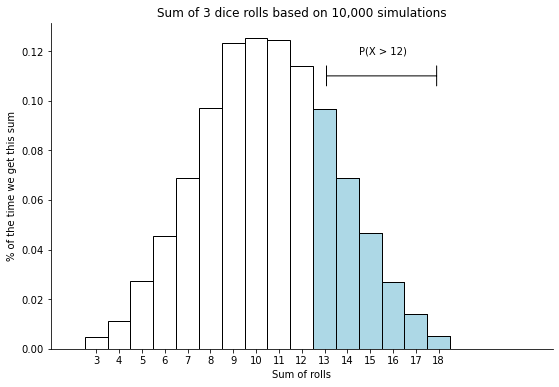

In [19]:
viz.simulation_example1(sums_by_trial)

The area shaded in lightblue represents our chance of winning, that is, the number of times that the sum of 3 dice rolls is greater than 12.

We can now convert each value in our array to a boolean value indicating whether or not we won:

In [20]:
wins = sums_by_trial > 12

To calculate an overall win rate, we can treat each win as a `1` and each loss as `0`, then take the average of the array:

In [21]:
win_rate = wins.mean()

In [22]:
win_rate

0.2586

Now that we know our win rate, we can calculate the expected profit:

In [23]:
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

-1.121

So we would expect, based on our simulations, on average, to lose a little over a dollar everytime we play this game.

To answer the last part of the question, we can recalculate our win rate based on the sums being greater than or equal to 12:

In [24]:
wins = sums_by_trial >= 12
win_rate = wins.mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

0.5889999999999995

If our win condition changes to the sum being greater than or equal to 12, then, based on our simulations, on average, we expect to win about 58 cents.

## Mini Exercise:

What is the probability of rolling "snake eyes" on a roll of two (fair) dice?

In [25]:
n_trials = n_rows = 10_000
n_dice = n_cols = 2

rolls = np.random.choice(possible_outcomes, n_trials * n_dice).reshape(n_rows, n_cols)
rolls

array([[6, 6],
       [4, 3],
       [2, 2],
       ...,
       [4, 6],
       [2, 5],
       [2, 2]])

In [26]:
sums_by_trial = rolls.sum(axis=1)
sums_by_trial

array([12,  7,  4, ..., 10,  7,  4])

In [27]:
wins = sums_by_trial == 2
wins

array([False, False, False, ..., False, False, False])

In [28]:
win_rate = wins.mean()
win_rate

0.0271

### No Rest or Relaxation

> There's a 30% chance my son takes a nap on any given weekend day. What is the chance that he takes a nap at least one day this weekend? What is the probability that he doesn't nap at all?

Let's first do a little bit of setup:

In [29]:
p_nap = 0.3
ndays = n_cols = 2
n_simulated_weekends = n_rows = 10_000

To simulate the results from many weekends, we'll create a 2 x 10,000 matrix, with 2 being the number of days in a weekend and 10,000 being the number of simulations we want to run.

To determine whether or not a nap is taken on a given day, we'll generate a random number between 0 and 1, and say that it is a nap if it is less than our probability of taking a nap.

In [30]:
naps = np.random.random((n_rows, n_cols))

In [31]:
naps[:10]

array([[0.18524057, 0.29228782],
       [0.64109676, 0.98283055],
       [0.64218136, 0.6191205 ],
       [0.36268078, 0.54111617],
       [0.99423743, 0.92867078],
       [0.67358305, 0.62189048],
       [0.00721732, 0.58358248],
       [0.94611047, 0.61110141],
       [0.67978087, 0.8339732 ],
       [0.01857456, 0.76816557]])

In [32]:
naps = naps < p_nap

In [33]:
naps

array([[ True,  True],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False,  True],
       [ True,  True]])

Now that we have each day as either true or false, we can take the sum of each row to find the total number of naps for the weekend. When we sum an array of boolean values, numpy will treat `True` as 1 and `False` as 0.

In [34]:
naps.sum(axis=1)

array([2, 0, 0, ..., 0, 1, 2])

Now we have the results of our simulation, an array where each number in the array represents how many naps were taken in a two day weekend.

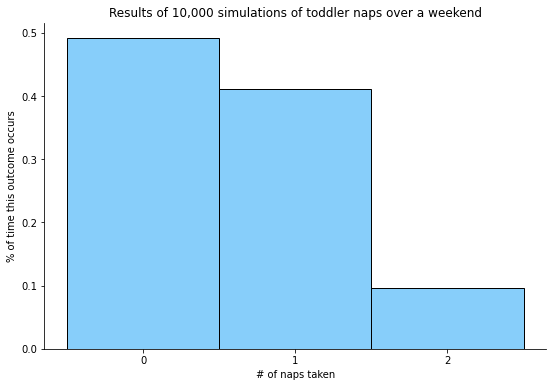

In [35]:
viz.simulation_example2(naps)

We can use this to answer our original questions, what is the probability that at least one nap is taken?

In [36]:
(naps.sum(axis=1) > 0).mean()

0.5083

What is the probability no naps are taken?

In [37]:
(naps.sum(axis=1) == 0).mean()

0.4917

In [38]:
(naps.sum(axis=1) > 1).mean()

0.0965

## Mini Exercise:

There are ten options in a blind-box style collectable, but you are only likely to get the one you want the most at a probability of one out of every twenty boxes because its a little rarer.

What is the probability of getting your desired collectable if you buy three blindbox toys?

In [39]:
p_fav = 0.05
nplays = n_cols = 3
n_trials = n_rows = 10_000

In [40]:
tests = np.random.random((n_rows, n_cols))
tests

array([[0.46190398, 0.59071453, 0.88420398],
       [0.76071154, 0.11294317, 0.85745105],
       [0.3217642 , 0.30661593, 0.90808991],
       ...,
       [0.2046499 , 0.55091891, 0.70115111],
       [0.25669068, 0.1844005 , 0.9081634 ],
       [0.55108994, 0.62560593, 0.63305804]])

In [41]:
success = tests < p_fav
success

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [42]:
(success.sum(axis=1) > 0).mean()

0.1382

### One With Dataframes

Let's take a look at one more problem:

> What is the probability of getting at least one 3 in 3 dice rolls?

To simulate this, we'll use a similar strategy to how we modeled the dice rolls in the previous example, but this time, we'll store the results in a pandas dataframe so that we can apply a lambda function that will check to see if one of the rolls was a 3.

In [43]:
n_trials = nrows = 10 ** 6
n_dice_rolled = ncols = 3

rolls = np.random.choice(possible_outcomes, n_trials * n_dice_rolled).reshape(nrows, ncols)

In [44]:
pd.DataFrame(rolls).apply(lambda row: 3 in row.values, axis=1)

0         False
1          True
2         False
3          True
4         False
          ...  
999995    False
999996     True
999997    False
999998    False
999999     True
Length: 1000000, dtype: bool

In [45]:
pd.DataFrame(rolls).apply(lambda row: 3 in row.values, axis=1).mean()

0.421527

Let's break down what's going on here:

1. First we assign values for the number of rows and columns we are going to use
1. Next we create the `rolls` variable that holds a 3 x 10,000 matrix where each element is a randomly chosen number from 1 to 6
1. Lastly we create a dataframe from the rolls
    1. `pd.DataFrame(rolls)` converts our 2d numpy matrix to a pandas DataFrame
    1. `.apply(...` applies a function to each **row** in our dataframe, because we specified `axis=1`, the function will be called with each row as it's argument. The body of the function checks to see if the value `3` is in the values of the row, and will return either `True` or `False`
    1. `.mean()` takes our resulting series of boolean values, and treats `True` as 1 and `False` as 0, to give us the average rate of `True`s, in this case, the simulated probability of getting a 3 in 3 dice rolls.

## Mini Exercise:

Recreate the blindbox problem utilizing the above strategy!


In [46]:
p_fav = 0.05
nplays = n_cols = 3
n_trials = n_rows = 10_000

In [47]:
tests = np.random.random((n_rows, n_cols))
tests

array([[0.90388223, 0.63535659, 0.42247723],
       [0.91952571, 0.61142113, 0.41237677],
       [0.09147618, 0.15018211, 0.23808321],
       ...,
       [0.31770538, 0.79834288, 0.04716317],
       [0.20084301, 0.01538891, 0.58192146],
       [0.40327877, 0.74174039, 0.38113355]])

In [48]:
pd.DataFrame(tests).apply(lambda x: x<p_fav, axis=1).mean()

0    0.0498
1    0.0519
2    0.0511
dtype: float64

In [49]:
# diferent method...
n_rows = 10_000
n_cols = 3
outcomes = [1,2,3,4,5,6,7,8,9,10]
prob_win = 0.05
prob_others = (1-prob_win)/9

In [50]:
data = np.random.choice(outcomes, n_rows * n_cols, p=[prob_win, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others]).reshape(n_rows, n_cols)

In [51]:
data[:5]

array([[2, 4, 7],
       [6, 6, 9],
       [3, 7, 7],
       [7, 8, 4],
       [4, 2, 1]])

In [52]:
pd.DataFrame(data).apply(lambda row: 1 in row.values, axis=1).mean()

0.1395

## Exercises

Within your `codeup-data-science directory`, create a directory named `statistics-exercises`. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

Do your work for this exercise in either a python file named `simulation.py` or a jupyter notebook named `simulation.ipynb`.

1. How likely is it that you roll doubles when rolling two dice?

In [53]:
# first I am going to solve the problem mathematically, so I have a baseline and can get my bearings...
(1/6)*(1/6)*6

0.16666666666666666

In [54]:
# now programmatically
n_trials = r_rows = 10_000
n_dice = n_cols = 2
possible_outcomes = [1,2,3,4,5,6]

data = np.random.choice(possible_outcomes, n_rows * n_cols).reshape(n_rows, n_cols)
data[:5]

array([[1, 1],
       [1, 2],
       [4, 1],
       [3, 4],
       [5, 5]])

In [55]:
pd.DataFrame(data).apply(lambda x: x[0]==x[1] in x.values, axis=1).mean()

0.1682

In [56]:
# another way to do this would be to do the snake eyes method, and then multiply by 6
# since each set of doubles has an identical chance of occurring
n_trials = n_rows = 10_000
n_dice = n_cols = 2

rolls = np.random.choice(possible_outcomes, n_trials * n_dice).reshape(n_rows, n_cols)

sums_by_trial = rolls.sum(axis=1)

wins = sums_by_trial == 2

win_rate = wins.mean()

doubles = win_rate*6
doubles


0.14579999999999999

2. If you flip 8 coins, what is the probability of getting exactly 3 heads? 

In [57]:
# first let's solve this mathematically, to make sure our work in the future is correct
#  you can get exactly 3 heads



In [58]:
n_trials = n_rows = 10_000
n_coins = n_cols = 8

heads = 1
tails =0

outcomes = [heads, tails]

flips = np.random.choice(outcomes, n_coins * n_trials).reshape(n_trials, n_coins)
flips



array([[1, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 0]])

In [59]:
sum_by_flips = flips.sum(axis=1)
sum_by_flips

array([5, 5, 4, ..., 6, 4, 3])

In [60]:
exactly_three = (sum_by_flips==3).mean()
exactly_three

0.2205

What is the probability of getting more than 3 heads?

In [61]:
n_trials = n_rows = 10_000
n_coins = n_cols = 8

heads = 1
tails = 0

outcomes = [heads, tails]

flips = np.random.choice(outcomes, n_coins * n_trials).reshape(n_trials, n_coins)
flips

array([[1, 0, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1]])

In [62]:
sum_by_flips = flips.sum(axis=1)
sum_by_flips

array([3, 6, 6, ..., 3, 4, 3])

In [63]:
more_than_three = (sum_by_flips>3).mean()
more_than_three

0.6378

3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [64]:
# let's assume each cohort has the same number of students

n_trials = n_rows = 10_000
n_draw = n_cols = 2

outcomes = [3,1]

prob_wb = 0.75
prob_ds = 1-prob_wb

data = np.random.choice(outcomes, n_rows * n_cols, p=[prob_wb, prob_ds]).reshape(n_rows, n_cols)
data

array([[1, 3],
       [3, 3],
       [3, 3],
       ...,
       [3, 3],
       [1, 1],
       [3, 3]])

In [65]:
sum_it_up = data.sum(axis=1)
sum_it_up

array([4, 6, 6, ..., 6, 2, 6])

In [66]:
double_ds = (sum_it_up == 2).mean()
double_ds

0.0614

4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

In [67]:
n_trials = n_rows = 10_000
n_days = n_cols = 5

testing = np.random.normal(3, 1.5, size =(n_trials, n_days))
testing

array([[3.17317878, 4.34320172, 1.79818967, 3.72628749, 3.32456431],
       [2.53269154, 3.59368194, 2.91677492, 2.88253772, 1.24946686],
       [2.19351905, 2.51422637, 5.14692721, 3.79159344, 2.79119592],
       ...,
       [4.96245737, 6.13732849, 2.46683366, 2.04411034, 3.62661697],
       [0.56379143, 1.19838439, 3.00140138, 3.03792432, 3.25052925],
       [2.70914035, 1.31597063, 4.87940622, 3.38321013, 1.8148605 ]])

In [68]:
testing_sums = testing.sum(axis=1)
testing_sums

array([16.36542197, 13.17515299, 16.43746198, ..., 19.23734683,
       11.05203077, 14.10258783])

In [69]:
yes_poptarts = (testing_sums < 17).mean()
yes_poptarts

0.725

5. Compare Heights

    - Men have an average height of 178 cm and standard deviation of 8cm.
    - Women have a mean of 170, sd = 6cm.
    - If a man and woman are chosen at random, P(woman taller than man)?

In [70]:
n_rows = 10_000
n_cols = 2

# create normal distribution of Men's height
men_dist = np.random.normal(178, 8, size=(10_000,1))
# create normal distribution of Women's height
women_dist = np.random.normal(170, 6, size=(10_000,1))

both_dist = np.column_stack((men_dist, women_dist))
both_dist


array([[164.85567623, 162.55116268],
       [178.50451268, 156.45432892],
       [157.41566642, 168.07189581],
       ...,
       [181.32316483, 166.18913605],
       [177.71824542, 173.07697128],
       [163.36663411, 161.98614291]])

In [71]:
men_women = np.subtract(men_dist, women_dist)
men_women

array([[  2.30451355],
       [ 22.05018376],
       [-10.65622938],
       ...,
       [ 15.13402878],
       [  4.64127414],
       [  1.38049119]])

In [72]:
women_men = (men_women < 0).mean()
women_men

0.211

6. When installing anaconda on a student's computer, there's a 1 in 250 chance
   that the download is corrupted and the installation fails. What are the odds
   that after having 50 students download anaconda, no one has an installation
   issue?  100 students?

    What is the probability that we observe an installation issue within the first
    150 students that download anaconda?

    How likely is it that 450 students all download anaconda without an issue?

In [73]:
# fail = 0
# succeed = 1
n_trials = n_rows = 10_000
n_students = n_cols = 50
fail_prob = (1/250)
no_fail = 1-fail_prob
outcomes = [0,1]

fifty_test = np.random.choice(outcomes, n_cols * n_rows, p = [fail_prob, no_fail]).reshape(n_rows, n_cols)
fifty_test



array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [74]:
fifty_totals = fifty_test.sum(axis=1)
fifty_totals

array([50, 50, 50, ..., 50, 49, 50])

In [75]:
fifty_fail = (fifty_totals<50).mean()
fifty_fail

0.1767

In [76]:
fifty_success = 1-fifty_fail
fifty_success

0.8233

In [77]:
# 100 students
# fail = 0
# succeed = 1
n_trials = n_rows = 10_000
n_students = n_cols = 100
fail_prob = (1/250)
no_fail = 1-fail_prob
outcomes = [0,1]

hundred_test = np.random.choice(outcomes, n_cols * n_rows, p = [fail_prob, no_fail]).reshape(n_rows, n_cols)
hundred_test

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [78]:
hundred_totals = hundred_test.sum(axis=1)
hundred_totals

array([100, 100, 100, ..., 100, 100, 100])

In [79]:
hundred_fail = (hundred_totals<100).mean()
hundred_fail

0.3296

In [80]:
hundred_success = 1-hundred_fail
hundred_success

0.6704

In [81]:
# 150 students
# fail = 0
# succeed = 1
n_trials = n_rows = 10_000
n_students = n_cols = 150
fail_prob = (1/250)
no_fail = 1-fail_prob
outcomes = [0,1]

hundred_fifty_test = np.random.choice(outcomes, n_cols * n_rows, p = [fail_prob, no_fail]).reshape(n_rows, n_cols)
hundred_fifty_test


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [82]:
hundred_fifty_totals = hundred_fifty_test.sum(axis=1)
hundred_fifty_totals

array([148, 150, 150, ..., 149, 147, 149])

In [83]:
hundred_fifty_fail = (hundred_fifty_totals<150).mean()
hundred_fifty_fail

0.4586

In [84]:
hundred_fifty_success = 1-hundred_fifty_fail
hundred_fifty_success

0.5414

In [85]:
# 450 students
# fail = 0
# succeed = 1
n_trials = n_rows = 10_000
n_students = n_cols = 450
fail_prob = (1/250)
no_fail = 1-fail_prob
outcomes = [0,1]

four_fifty_test = np.random.choice(outcomes, n_cols * n_rows, p = [fail_prob, no_fail]).reshape(n_rows, n_cols)
four_fifty_test

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [86]:
four_fifty_totals = four_fifty_test.sum(axis=1)
four_fifty_totals

array([450, 449, 447, ..., 448, 449, 446])

In [87]:
four_fifty_fail = (four_fifty_totals<450).mean()
four_fifty_fail

0.8352

In [88]:
four_fifty_success = 1-four_fifty_fail
four_fifty_success

0.16479999999999995

7. There's a 70% chance on any given day that there will be at least one food
   truck at Travis Park. However, you haven't seen a food truck there in 3 days.
   How unlikely is this?

    How likely is it that a food truck will show up sometime this week?

In [89]:
no_truck = 0
truck = 1

n_trials = n_rows = 10_000
n_days = n_cols = 3
outcomes = [0,1]
truck_prob = 0.7
no_truck_prob = 0.3

three_day_test = np.random.choice(outcomes, n_cols * n_rows, p=[no_truck_prob, truck_prob]).reshape(n_rows, n_cols)
three_day_test


array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 0],
       ...,
       [1, 1, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [90]:
three_day_sum = three_day_test.sum(axis=1)
three_day_sum

array([3, 3, 2, ..., 3, 2, 2])

In [91]:
bad_luck = (three_day_sum==0).mean()
bad_luck

0.0293

In [92]:
# how likely is it that a truck will show up this week, 
# given that 3 days in, there has not been a truck, 
# what are the chances of a truck showing up at least once in the next 4 days?

no_truck = 0
truck = 1

n_trials = n_rows = 10_000
n_days = n_cols = 4
outcomes = [0,1]
truck_prob = 0.7
no_truck_prob = 0.3

four_day_test = np.random.choice(outcomes, n_cols * n_rows, p=[no_truck_prob, truck_prob]).reshape(n_rows, n_cols)
four_day_test


array([[1, 1, 1, 1],
       [1, 1, 1, 0],
       [1, 1, 1, 0],
       ...,
       [0, 1, 0, 0],
       [1, 1, 0, 1],
       [1, 0, 0, 1]])

In [93]:
day = (.7)

In [94]:
# showing up everyday
day**7

0.08235429999999996

In [95]:
# never showing up
no_day = .3
no_show = no_day**7
no_show

0.00021869999999999995

In [96]:
# showing up at least once
1-no_show

0.9997813

In [97]:
# showing up three times
day**3 + no_day**4

0.3510999999999999

In [98]:
# what about 5 times per week
day**5 + no_day**2

0.2580699999999999

In [102]:
# # seeing the big picture
# # number of flips          number of outcomes
# 1                       2
# 2                       4
# 3                       8
# # ALL HEADS
# HHH
# # 2 HEADS
# HHT
# HTH
# THH
# # 1 HEAD
# HTT
# THT
# TTH
# # 0 HEADS
# TTT

# 4                             15
# # ALL HEADS
# HHHH

# # 3 HEADS
# HHHT
# HHTH
# HTHH
# THHH

# # 2 HEADS
# HHTT
# HTHT
# HTTH
# TTHH
# THTH

# # 1 HEADS
# HTTT
# THTT
# TTHT
# TTTH
# # 0 HEADS
# TTTT

# # LETS LOOK AT 5 FLIPS

# # ALL HEADS AND NO HEADS = 1 (*2 = 2)
# HHHHH

# # 4 HEADS AND 1 HEAD = 5 (*2 = 10)
# HHHHT
# HHHTH
# HHTHH
# HTHHH
# THHHH

# # 3 HEADS AND 2 HEADS = 10 (*2 = 20)
# HHHT2
# HHTHT
# HHTTH
# HTHTH
# HTTHH
# HTHHT
# THHHT
# THHTH
# THTHH
# TTHHH






In [103]:
four_day_sum = four_day_test.sum(axis=1)
four_day_sum

array([4, 3, 3, ..., 1, 3, 2])

In [104]:
good_luck = (four_day_sum > 0).mean()
good_luck

0.9904

In [105]:
# demo for fun
no_truck = 0
truck = 1

n_trials = n_rows = 10_000
n_days = n_cols = 7
outcomes = [0,1]
truck_prob = 0.7
no_truck_prob = 0.3

seven_day_test = np.random.choice(outcomes, n_cols * n_rows, p=[no_truck_prob, truck_prob]).reshape(n_rows, n_cols)
seven_day_test


array([[0, 1, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 1]])

In [106]:
seven_day_sum = seven_day_test.sum(axis=1)
seven_day_sum

array([6, 4, 6, ..., 5, 5, 5])

In [107]:
good_luck_week = (seven_day_sum > 0).mean()
good_luck_week

0.9999

8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [108]:
# first, we have to assume that each date has an equal chance of being someone's birthdate

b_days = np.arange(1,366)

n_trials = n_rows = 10_000
n_people = n_cols = 23

first_test = np.random.choice(b_days, n_cols * n_rows).reshape(n_rows, n_cols)
first_test

array([[202,  23, 322, ..., 208, 271, 183],
       [192, 200, 112, ..., 107, 307, 347],
       [229, 134, 254, ..., 290, 257, 256],
       ...,
       [190,  74,  29, ..., 199,  85,  97],
       [ 25,  49, 238, ...,  50, 258, 358],
       [295,   5, 284, ..., 257, 266, 218]])

In [109]:
second_test = pd.DataFrame(first_test)
second_test

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,202,23,322,78,197,163,303,341,157,276,...,258,161,212,73,211,207,61,208,271,183
1,192,200,112,55,347,46,24,138,344,54,...,117,72,339,102,20,112,193,107,307,347
2,229,134,254,30,294,272,37,42,343,99,...,7,63,313,309,80,58,225,290,257,256
3,211,357,286,70,327,177,266,237,231,363,...,303,349,139,12,110,348,165,51,220,263
4,197,208,152,56,39,108,252,23,90,126,...,328,233,21,139,167,203,296,321,228,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,170,356,258,123,219,214,352,98,177,22,...,270,30,217,362,20,250,42,154,264,320
9996,228,271,359,302,284,217,154,73,90,27,...,236,237,317,304,341,25,12,152,41,311
9997,190,74,29,246,10,191,113,305,322,143,...,34,305,224,75,32,364,173,199,85,97
9998,25,49,238,194,3,103,109,151,267,240,...,259,124,272,146,142,302,227,50,258,358


In [110]:
third_test = second_test.nunique(axis=1)
third_test

0       23
1       20
2       23
3       23
4       23
        ..
9995    23
9996    23
9997    22
9998    23
9999    21
Length: 10000, dtype: int64

In [111]:
fourth_test = (third_test < 23).mean()
fourth_test

0.5135

In [112]:
# what if it's only 20 people

b_days = np.arange(1,366)

n_trials = n_rows = 10_000
n_people = n_cols = 20

twenty_test = np.random.choice(b_days, n_cols * n_rows).reshape(n_rows, n_cols)
twenty_test

array([[114, 113, 184, ...,  85, 182, 128],
       [244, 142, 301, ..., 177, 151, 233],
       [101, 342,  46, ...,  47, 151,   4],
       ...,
       [161, 153, 127, ..., 285, 111,  85],
       [114, 162, 317, ..., 124,  31, 112],
       [264, 332, 141, ..., 140, 360, 132]])

In [113]:
second_twenty = pd.DataFrame(twenty_test)
second_twenty

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,114,113,184,285,87,107,27,179,144,349,218,226,182,151,301,139,228,85,182,128
1,244,142,301,95,47,165,172,167,78,150,355,350,40,294,4,230,91,177,151,233
2,101,342,46,213,252,294,135,202,357,120,117,242,208,361,18,176,299,47,151,4
3,310,42,47,304,320,317,27,14,76,330,138,31,285,285,203,144,307,143,243,30
4,255,191,302,293,214,75,204,197,227,353,286,77,347,357,308,8,265,23,236,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,139,15,319,75,346,186,334,317,273,208,344,276,215,330,234,340,55,176,35,179
9996,40,226,52,59,199,261,207,289,34,163,331,124,73,146,265,321,167,70,287,162
9997,161,153,127,341,279,99,90,286,317,95,102,301,265,309,37,32,257,285,111,85
9998,114,162,317,190,251,327,34,361,216,318,46,334,352,134,247,321,291,124,31,112


In [114]:
third_twenty = second_twenty.nunique(axis=1)
third_twenty

0       19
1       20
2       20
3       19
4       20
        ..
9995    20
9996    20
9997    20
9998    20
9999    20
Length: 10000, dtype: int64

In [115]:
fourth_twenty = (third_twenty < 20).mean()
fourth_twenty

0.4145

In [116]:
# what about 40 people?
b_days = np.arange(1,366)

n_trials = n_rows = 10_000
n_people = n_cols = 40

forty_test = np.random.choice(b_days, n_cols * n_rows).reshape(n_rows, n_cols)
forty_test

array([[234, 139,  82, ..., 317, 234, 287],
       [107, 277, 357, ..., 353, 223, 259],
       [164, 311, 183, ..., 186,  74,  90],
       ...,
       [ 41, 248, 278, ...,  57, 307, 333],
       [294,  27, 279, ..., 140, 282,   6],
       [  2, 163, 125, ..., 278,  48,  33]])

In [117]:
second_forty = pd.DataFrame(forty_test)
second_forty

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,234,139,82,183,220,238,253,52,348,302,...,134,233,318,89,323,56,157,317,234,287
1,107,277,357,266,94,331,240,103,362,5,...,68,145,364,81,1,217,133,353,223,259
2,164,311,183,23,234,204,113,279,327,352,...,210,352,141,169,360,334,325,186,74,90
3,312,181,215,43,107,308,147,55,21,106,...,6,95,356,198,275,302,169,340,186,235
4,92,232,350,114,143,31,90,213,325,176,...,158,54,166,39,124,337,184,162,230,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,142,361,350,245,76,257,333,102,9,249,...,172,110,140,8,157,364,38,138,207,12
9996,294,299,357,135,125,95,85,162,315,281,...,21,310,69,164,64,311,255,129,231,157
9997,41,248,278,154,33,67,142,227,184,15,...,293,325,72,227,311,92,73,57,307,333
9998,294,27,279,73,233,251,206,252,152,227,...,111,292,122,359,28,115,301,140,282,6


In [118]:
third_forty = second_forty.nunique(axis=1)
third_forty

0       36
1       36
2       39
3       39
4       40
        ..
9995    36
9996    38
9997    38
9998    38
9999    38
Length: 10000, dtype: int64

In [119]:
fourth_forty = (third_forty < 40).mean()
fourth_forty

0.8961

In [120]:
# MORE SUPER HAPPY FUN TIME

n_trials = n_rows = 10_000
n_coins = n_cols = 5

heads = 1
tails = 0

outcomes = [heads, tails]

flips = np.random.choice(outcomes, n_coins * n_trials).reshape(n_trials, n_coins)
flips

array([[1, 1, 0, 0, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1],
       ...,
       [0, 1, 1, 0, 1],
       [0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1]])

In [160]:
sum_by_flips = flips.sum(axis=1)
sum_by_flips

array([3, 2, 3, ..., 2, 2, 1])

In [161]:
exactly_three = (sum_by_flips==3).mean()
exactly_three

0.3146

#### Bonus Exercises
- [Mage Duel](https://gist.github.com/ryanorsinger/2996446f02c1bf30fcb3f8fdb88bd51d)
- [Chuck a Luck](https://gist.github.com/ryanorsinger/eac1d7b7e978f90b8390bdc056312123)